In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
le_model = LabelEncoder()
df['city'] = le_model.fit_transform(df['city'])
df['statezip'] = le_model.fit_transform(df['statezip'])

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['Age_of_the_House'] = df['year'] - df['yr_built']

In [7]:
df.drop(columns=['country','street','date','year'] , inplace= True)

6    2179
5    1768
7     653
Name: month, dtype: int64


Text(0, 0.5, 'price')

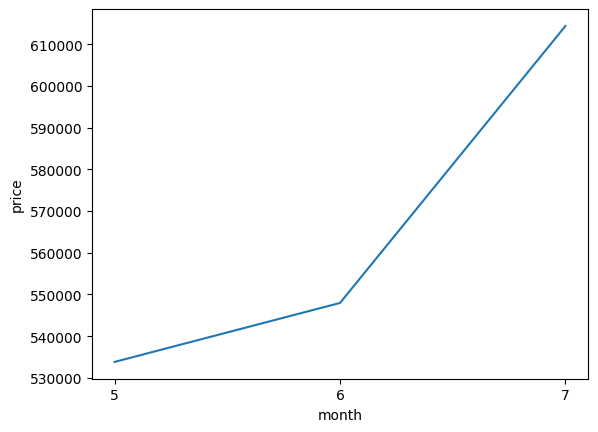

In [8]:
print(df['month'].value_counts())
plt.xticks(np.arange(5,8,1))
df.groupby('month').mean()['price'].plot()
plt.ylabel('price')

In [9]:
df.drop(columns=['month'], inplace=True)
df.dtypes # Now model can d

price               float64
bedrooms            float64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront            int64
view                  int64
condition             int64
sqft_above            int64
sqft_basement         int64
yr_built              int64
yr_renovated          int64
city                  int32
statezip              int32
Age_of_the_House      int64
dtype: object

In [10]:
x = df.drop('price',axis=1)
y= df[['price']]

In [11]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2 ,random_state=50)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3680, 15)
(3680, 1)
(920, 15)
(920, 1)


In [13]:
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(10,activation='relu' , input_dim= 15),
    Dense(10, activation= 'relu'),
    Dense(10, activation= 'relu'),
    Dense(1 , activation= 'linear')
])

model.compile(optimizer=Adam(0.001) , loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, batch_size=30, epochs=100, validation_split=0.2)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026 - val_loss: 2.2124e-04
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 1.7874e-04
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5603e-04 - val_loss: 1.7499e-04
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 8.5113e-04 - val_loss: 1.6315e-04
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 5.4468e-04 - val_loss: 1.4566e-04
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 4.2152e-04 - val_loss: 1.4325e-04
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 3.4375e-04 - val_loss: 1.6791e-04
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 2.8255e-04 - val_loss: 1.4689e-04
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 4.0550e-04 - val_loss: 1.2966e-04
Epoch 10/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6796e-04 - val_loss: 1.4368e-04
Epoch 11/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 4.1

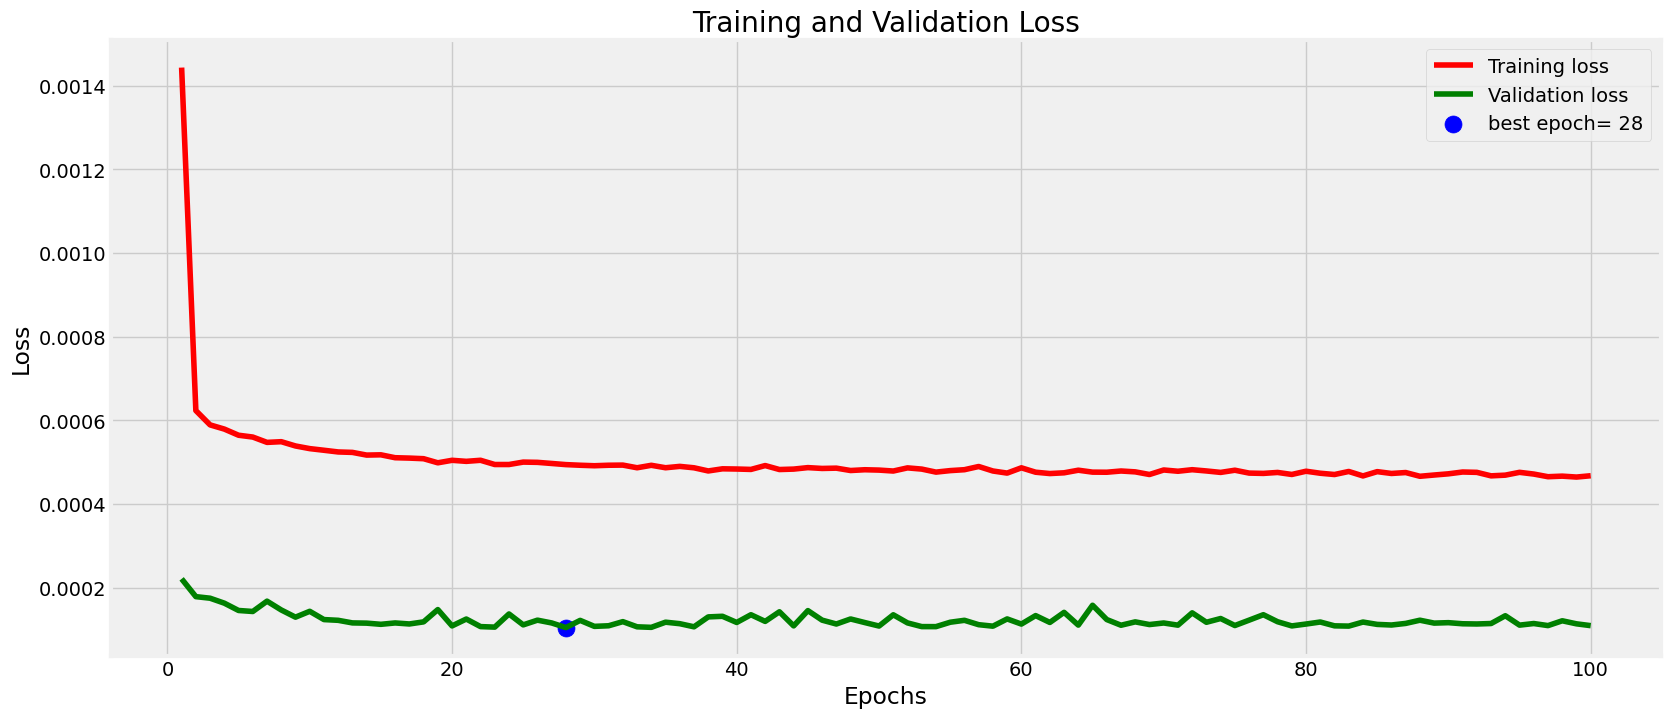

In [15]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [16]:
y_pred = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [17]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2)

R2 Score= 0.5548159405241011


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 8.016985545918228e-05
Mean Absolute Error: 0.006008045332629568
Root Mean Squared Error: 0.008953762084128786
